# Homework 5: An External Forcing Experiment

Name: 

Date: 

#### Overview
In class, we set up the MITgcm `global_ocean_ebm` configuration with the `exf` package to run on MITgcm. In this assignment, we will assess the output of this model configuration. 

To begin, import the Python modules for manging and plotting data, and making movies. Then, define a path to your homework 5 directory. Finally, the `diags` folder on Spartan to your local machine.

In [1]:
# import pertinent modules
import os
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cm
import moviepy.video.io.ImageSequenceClip

# define a path to the diags directory
diags_dir = '/Users/cool/Workspace/MLML/ms274_fall2025/Homework/HW_5/run/diags'

### Part 1: Choose Variables to Examine 
In this assignment, you'll investigate the relationship between a state variable (temperature, salinity, or velocity) and an associated forcing variable (heat flux, freshwater flux, or wind stress). 

In the markdown cell below, indicate which pair of variables you're going to investigate.


temperature and heat flux

### Part 2: Make a Movie
Next, make a movie for your variables of interest. The movie should show your state variable in one panel and your forcing variable in another panel. If you are using velocity and wind stress, you can either plot the magnitude of these variables or plot the vector components individually.

In [2]:
# edit these code cells
# provide a path to the data file
exf_file = os.path.join(diags_dir, 'diagsEXF', 'diagsEXF.0000003590.data')
surf_file = os.path.join(diags_dir, 'diagSurf', 'diagSurf.0000003590.data')
hfacc_file = os.path.join(diags_dir, 'hFacC.data')

# meta data
# fldList = {
# 'EXFtaux ' 'EXFtauy ' 'EXFqnet ' 'EXFempmr'
# };
# fldList = {
# 'THETA   ' 'SALT    '
# };

# read in the file and reshape it to the proper dimensions
n_rows = 40  #sNy
n_cols = 90 #sNx
exf_field_streams = 4 
surf_field_streams = 2
exf_grid = np.fromfile(exf_file, '>f4').reshape((exf_field_streams, n_rows, n_cols))
qnet_grid = exf_grid[2]

surf_file = os.path.join(diags_dir, 'diagSurf', 'diagSurf.0000003590.data')
surf_grid = np.fromfile(surf_file, '>f4').reshape((surf_field_streams, n_rows, n_cols))
theta_grid = surf_grid[0]

hfacc_grid = np.fromfile(hfacc_file, '>f4').reshape((15, n_rows, n_cols))
maskC = hfacc_grid[0]                   

# masking
theta_mask = np.ma.masked_where(maskC == 0, theta_grid)
qnet_mask  = np.ma.masked_where(maskC == 0, qnet_grid)
print("Overall Qnet range:", qnet_grid.min(), "to", qnet_grid.max())


Overall Qnet range: -205.12161 to 274.10687


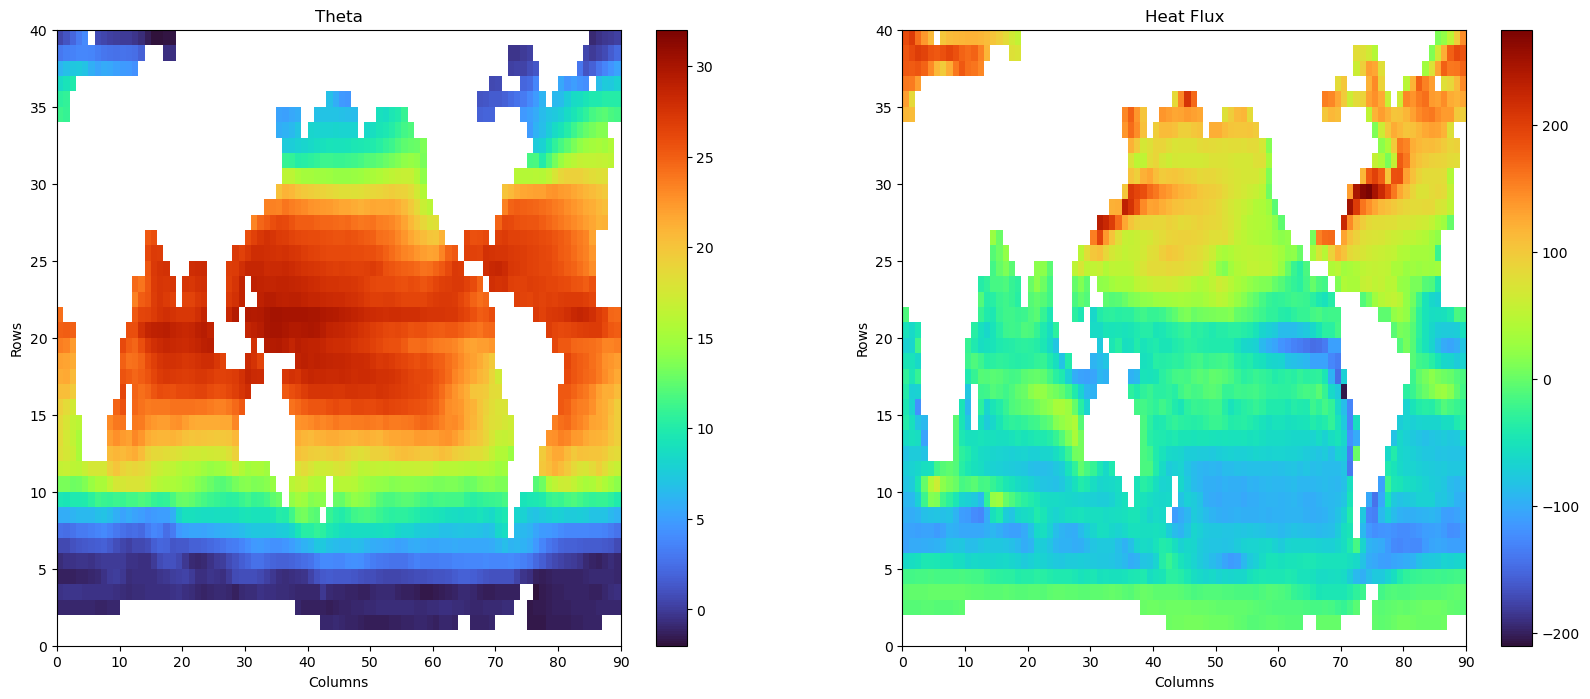

In [3]:
# with code you will use
# make a figure object
fig = plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
# plot the field
plt.pcolormesh(theta_mask, cmap='turbo', vmin=-2, vmax=32)
plt.colorbar()
# show the figure
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Theta')

plt.subplot(1,2,2)
# plot the field
plt.pcolormesh(qnet_mask, cmap='turbo', vmin=-210, vmax=275)
plt.colorbar()
# show the figure
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Heat Flux')

plt.show()

In [4]:
# to make your movie
def plot_frame(theta_data_path, qnet_data_path, image_path): 
    
    fig = plt.figure(figsize = (20,8))
    
    surf_grid = np.fromfile(theta_data_path, '>f4').reshape((surf_field_streams, n_rows, n_cols))
    theta_grid = surf_grid[0]
    theta_mask = np.ma.masked_where(maskC == 0, theta_grid)

    exf_grid = np.fromfile(qnet_data_path, '>f4').reshape((exf_field_streams, n_rows, n_cols))
    qnet_grid = exf_grid[2]
    qnet_mask  = np.ma.masked_where(maskC == 0, qnet_grid)
    
    plt.subplot(1,2,1)
    # plot the field
    plt.pcolormesh(theta_mask, cmap='turbo', vmin=-2, vmax=32)
    plt.colorbar()
    # show the figure
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.title('Theta')
    
    plt.subplot(1,2,2)
    # plot the field
    plt.pcolormesh(qnet_mask, cmap='turbo', vmin=-210, vmax=275)
    plt.colorbar()
    # show the figure
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.title('Heat Flux')
    
    
    # show the figure
    plt.savefig(image_path)
    plt.close(fig)

In [5]:
# make a list that will hold the paths
file_list = []

# loop through each day of the year
for day in range(0, 3600, 10):
    # identify the data file path
    theta_data_path = os.path.join(diags_dir, 'diagSurf', 'diagSurf.'+'{:010d}'.format(day)+'.data')
    qnet_data = os.path.join(diags_dir, 'diagsEXF', 'diagsEXF.'+'{:010d}'.format(day)+'.data')

    # identify the image file path
    image_path = os.path.join(diags_dir, 'plots', 'THETA_QNET.'+'{:010d}'.format(day)+'.png')
    

    # call the plotting function
    plot_frame(theta_data_path, qnet_data, image_path)

    # add the imaghe path to the file path list (for the next step)
    file_list.append(image_path)

Comment on any features you observe in your movie. Place particular focus on the potential connection(s) between your state variable and the forcing.

Theres a clear connection between theta and heat flux. positive heat flux represents heat from the atmosphere going into the ocean, while negative is the opposite. This can be seen in the video where in colder water in the poles, especially during the winter seasons, theres a large heat flux value, whereas in the warmest parts of the ocean around the equator, the heat flux barely ever goes above 0, as the ocean is never really cool enough to for heat to go from the atmosphere to the ocean. YOu can really see the impact of seasonality around the northern atlantic and norhtern pacific, where the heat flux changes significantly due to seasonal changes impact the temperature of the ocean quite significantly in those region. Thus as those areas cool down in the winter, heat flux increases, and when that water warms up, the heat flux tends towards a negative value. 

In [6]:
# set the frames per second
fps=5

# use the ImageSequenceClip module to set up the clip
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(file_list, fps=fps)

# write the video to a file
output_file = os.path.join(diags_dir, 'THETA_QNET.mp4')
clip.write_videofile(output_file)

Moviepy - Building video /Users/cool/Workspace/MLML/ms274_fall2025/Homework/HW_5/run/diags/THETA_QNET.mp4.
Moviepy - Writing video /Users/cool/Workspace/MLML/ms274_fall2025/Homework/HW_5/run/diags/THETA_QNET.mp4



Moviepy - Done !
Moviepy - video ready /Users/cool/Workspace/MLML/ms274_fall2025/Homework/HW_5/run/diags/THETA_QNET.mp4


### Part 3: Plot Time Series at a Location
Based on your movie, choose an interesting place in your model domain and create a timeseries of your variables at this location. There should be two plots - either as two horizontal subplots (one for each variable), or one plot with two separate y-axes for the different variables.

Again you are using velocity and wind stress, you can either plot the magnitude of these variables or plot the vector components individually.

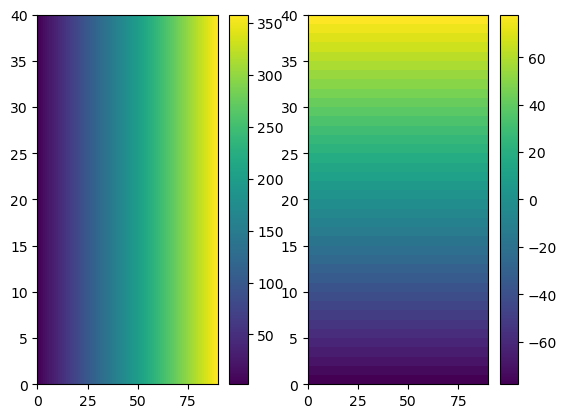

In [7]:
# read in the XC and YC fields
XC_file = os.path.join(diags_dir, 'XC.data')
XC = np.fromfile(XC_file, '>f4').reshape(40, 90)

YC_file = os.path.join(diags_dir, 'YC.data')
YC = np.fromfile(YC_file, '>f4').reshape(40, 90)

# remake a side by side plot of the XC and YC fields
plt.subplot(1,2,1)
plt.pcolormesh(XC)
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(YC)
plt.colorbar()

In [8]:
# to choose your location
# define the lon/lat point
#labrador sea
lon = 305
lat = 60

# find its location in the grid
dist = ((XC - lon)**2 + (YC-lat)**2) **0.5
row, col = np.where(dist==np.min(dist))
print(row, col)

[34 35] [76 76]


In [9]:
# make your timeseries
# make an empty array
theta_timeseries = np.zeros((360,))
qnet_timeseries = np.zeros((360,))

# loop through all the files in the diags dir
for k, day in enumerate(range(0, 3600, 10)):

    # identify the data file path
    theta_data_path = os.path.join(diags_dir, 'diagSurf', 'diagSurf.'+'{:010d}'.format(day)+'.data')
    qnet_data_path = os.path.join(diags_dir, 'diagsEXF', 'diagsEXF.'+'{:010d}'.format(day)+'.data')    

    # read in the data
    surf_grid = np.fromfile(theta_data_path, '>f4').reshape((surf_field_streams, n_rows, n_cols))
    theta_grid = surf_grid[0]
    theta_mask = np.ma.masked_where(maskC == 0, theta_grid)

    exf_grid = np.fromfile(qnet_data_path, '>f4').reshape((exf_field_streams, n_rows, n_cols))
    qnet_grid = exf_grid[2]
    qnet_mask  = np.ma.masked_where(maskC == 0, qnet_grid)    

    # sample the data at the point provided and store it in the array
    theta_timeseries[k] = theta_grid[row[0], col[0]]
    qnet_timeseries[k] = qnet_grid[row[0], col[0]]
    

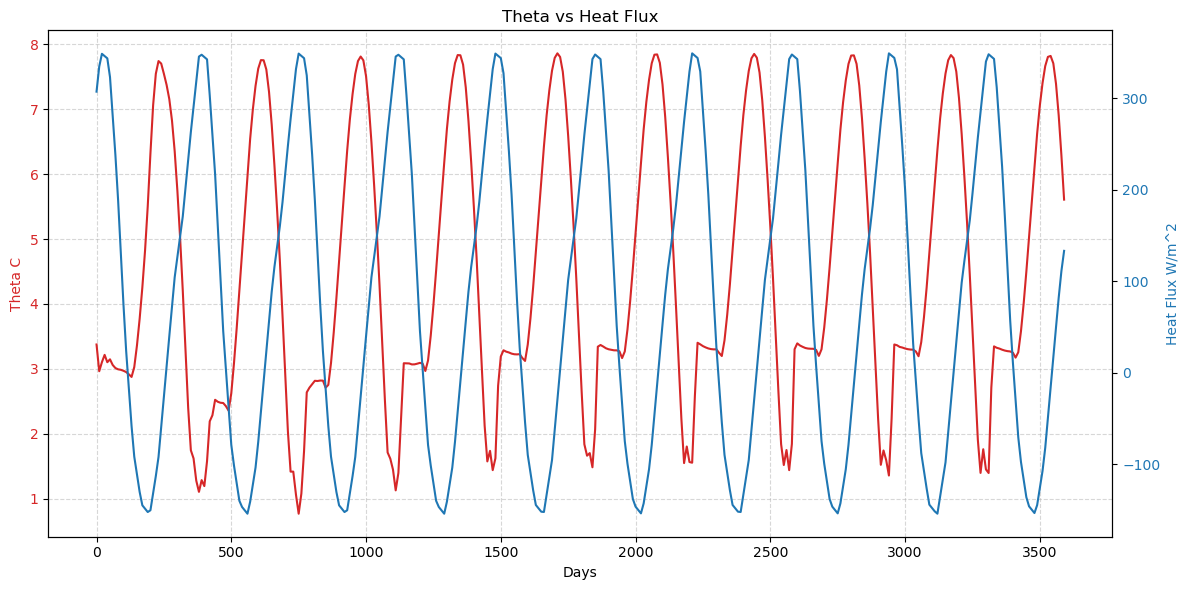

In [10]:
fig, ax1 = plt.subplots(figsize=(12,6))

days = np.arange(0, 3600, 10)

color = 'tab:red'
ax1.plot(days, theta_timeseries, color=color, label='Theta C')
ax1.set_xlabel('Days')
ax1.set_ylabel('Theta C', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(days, qnet_timeseries, color=color, label='Heat Flux W/m^2')
ax2.set_ylabel('Heat Flux W/m^2', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Theta vs Heat Flux')
ax1.grid(True, which='both', linestyle='--', alpha=0.5)

fig.tight_layout()
plt.show()

Comment on any features you observe in your timeseries. Place particular focus on the potential connection(s) between your state variable and the forcing. Is there anything you observe in your timeseries that you didn't catch by eye in your movie?

*Edit this markdown cell and enter your observations here*

The general trend I described before with positive heat flux peaking when the temperature of the ocean is at its lowest, seems generally true. However, one can see that is a bit of lag between these periods when looking more closely at the timeseries. The peak of the heat flux value occurs a bit of time after the peak low value of the ocean at this point is reached. Also the trend at the opposite end one would expect to see, with the ocean being at its warmest having the peak negative heat flux, has a much less smooth and more complex trend line, with a short period of an extreme drop in heat flux after reaching its peak low value. The peak negative heat flux in general has a less predictiable and stable pattern compared to the peak positive heat flux values.